# Mašinsko učenje - Priprema za kolokvijum

Pretpostavke:
1. Instalirana biblioteka pandas `python -m pip install scikit-learn`
2. Instalirana biblioteka scikit-learn `python -m pip install pandas`

In [1]:
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

## Zadatak 1
Učitati skup podataka abalone.csv. Izdvojiti kolone Viscera weight i Length. Iscrtati grafik za ove kolone. Podeliti skup podataka na obučavajući i test skup u odnosu 80:20. Na osnovu atributa Length odrediti vrednost atributa Viscera weight. Koristiti linearnu regresiju. Izmeriti grešku modela nad test podacima. Grafički prikazati rezultate model.

In [2]:
abalone = pandas.read_csv("datasets/abalone.csv")
abalone

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [3]:
viscera_weight = abalone["Viscera weight"]
length = abalone["Length"]
plt.scatter(length, viscera_weight)

train_x, test_x, train_y, test_y = train_test_split(length, viscera_weight, test_size=0.2)
lin_reg = LinearRegression()

train_x = train_x.to_numpy().reshape(-1, 1)
train_x2 = np.column_stack([train_x, train_x**2])
test_x = test_x.to_numpy().reshape(-1, 1)
test_x2 = np.column_stack([test_x, test_x**2])
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()

lin_reg.fit(train_x2, train_y)

x = np.linspace(0, 0.9, 1000).reshape(-1, 1)
x2 = np.column_stack([x, x**2])

plt.plot(x, lin_reg.predict(x2), c='r')
print(lin_reg.score(test_x2, test_y))

plt.scatter(test_x, test_y)
plt.scatter(test_x, lin_reg.predict(test_x2))

0.8916324705135319


## Zadatak 2
Učitati skup podataka iris.csv. Izdvojiti prvu, drugu i poslednju kolonu. Poslednja kolona predstavlja klasu. Iscrtati grafik za ove kolone. Podeliti skup podataka na obučavajući i test skup u odnosu 80:20. Na osnovu prve dve kolone odrediti odrediti klasu kojoj instanca pripada. Koristiti neki od algoritama za klasifikaciju. Izmeriti grešku modela nad test podacima. Grafički prikazati rezultate model.

0.8666666666666667


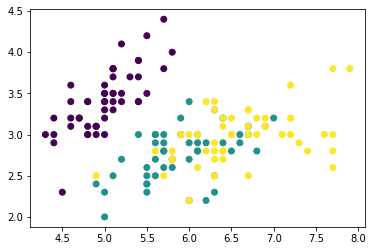

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

iris = pandas.read_csv("datasets/iris.csv", header=None)
x = iris.loc[:,:1].to_numpy()
y = iris[4].to_numpy()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

# klasifikator = KNeighborsClassifier(n_neighbors=5)
klasifikator = LogisticRegression()
klasifikator.fit(train_x, train_y)

print(klasifikator.score(test_x, test_y))

plt.scatter(x[:,0], x[:, 1], c=y)

In [5]:
plt.scatter(test_x[:,0], test_x[:, 1], c=klasifikator.predict(test_x), marker="x", s=200)
plt.scatter(test_x[:,0], test_x[:, 1], c=test_y)

## Zadatak 3
Učitati skup podataka churn.csv. Na osnovu svih atributa u skupu podatak potrebno je odrediti vrednost atributa churn. Obrazložiti izbor modela kao i transformacija sprovedenih nad podacima. Izračunati tačnost modela.

## Zadatak 4
Učitati skup podataka cpu.csv. Na osnovu svih atributa u skupu podatak potrebno je odrediti vrednost atributa fork. Obrazložiti izbor modela kao i transformacija sprovedenih nad podacima. Izračunati tačnost modela.

## Zadatak 5
Na osnovu podataka dostavljenih u datoteci winequality-red.csv odrediti napraviti model za određivanje kvaliteta vina. Obrazložiti izbor modela i transformacije primenjene nad podacima. Izračunati tačnost modela.